In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model,metrics
import seaborn as sns

In [2]:
boston = datasets.load_boston(return_X_y=False)

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
dataframe = pd.DataFrame(boston.data,columns=boston.feature_names)
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
df1 =pd.DataFrame(boston.target)
df1

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

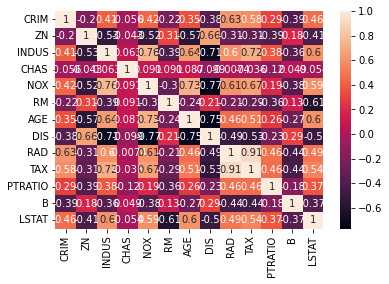

In [8]:
sns.heatmap(dataframe.corr(),annot=True)

In [9]:
x = boston.data
print(x.shape)
print(x[:1])

(506, 13)
[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]


In [10]:
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [11]:
y = boston.target
print(y.shape)
print(x[:1])

(506,)
[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]


In [12]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
print(boston['filename'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [17]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = reg.predict(x_test)
y_pred

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

In [19]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1,
       25. ,  9.7, 23.9, 36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5,
       23.7, 28.5, 24.3, 23.8, 19.1, 28.4, 20.5, 33

In [20]:
x_pred = reg.predict(x_train)
x_pred

array([19.49451875, 18.82565898, 19.41807533, 32.03931878, 17.2230352 ,
       28.45549726, 23.21216871, 29.37049331, 33.61179545, 34.94066348,
       23.81998788, 18.34127112, 19.66109575, 20.98223266, 26.15743995,
       15.45274148, 15.55297167, 26.29338021, 22.11328077, 17.9669978 ,
       14.50342335, 29.91852348, 19.34230278, 24.24343322, 33.81466314,
       25.11692998, 36.33810802, 21.33548013, 23.06006323, 27.12467047,
       17.63192534, 33.21172666, 13.26427133, 22.8025385 , 20.16155909,
       34.02972138, 21.47683095, 22.29665391, 21.03032208, 16.12321845,
       22.65719498, 24.40172533, 22.33573654, 18.42808004, 33.30291878,
       21.21459593, 34.14345366, 26.53408502, 18.39954821,  3.92954538,
       25.02373796, 18.21858646, 14.8802822 , 28.44533508, 29.90807067,
       22.89655095, 19.34012675, 20.90441989, 26.76848763, 19.79462599,
       30.683131  , 19.11168697, 19.9946338 , 24.20654673, 16.42067195,
       13.85203025, 26.08780245, 24.34011752, 22.4151824 , 20.92

In [21]:
y_train

array([20.4, 16. , 13.3, 30.8, 27.5, 24.4, 24.4, 25.1, 43.8, 21.9, 26.2,
       14.2, 20.8, 20.1, 23.1, 13.1, 16.2, 24.8, 20.2, 22.5, 14.8, 28.7,
       20.1, 23.4, 32. , 19.1, 50. , 20.9, 21.7, 22. , 17.2, 30.3, 12.3,
       21.4, 20.5, 35.2, 19.6, 22. , 21.7, 14.1, 21.1, 15. , 11.9, 20. ,
       41.3, 18.7, 50. , 50. , 18.4, 17.9, 28.1, 16.1, 17.2, 28.6, 23.6,
       20.4, 19.6, 18.8, 22.6, 17.7, 30.5, 18.2, 20.6, 24.4, 17.3, 13.3,
       22.8, 20.5, 21.2, 18.8, 18.9, 18.2, 23.1, 32.7, 24. , 10.2, 19.5,
       33.1, 13.4, 15.2, 24.8, 24.3,  9.5, 24.2, 18.5, 44. , 50. , 24.7,
       21.5,  8.4, 21.8, 50. , 23.8, 32.4, 24.4, 17.6, 29.8,  9.6, 16.7,
       13.8, 32. , 16.1,  8.3, 26.6, 14.3, 15. , 28.4, 32.2, 17.1, 29.4,
       10.4, 16.8, 31.5, 27.5, 46.7, 27.5, 17.2, 23.4, 31.6, 13.8, 22. ,
       17. , 24.8, 24.3, 25.2, 21.2, 20.6, 18.7,  5.6, 19.3, 19.8, 22.3,
       20.3, 12. , 23.9, 16.5, 13.2, 33.2, 10.5,  7.5, 27.5, 18.4, 23.2,
       13.8, 35.4, 23. , 25. ,  7.2, 14.4,  8.8, 22

In [22]:
print('Coefficients : \n',reg.coef_)

Coefficients : 
 [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


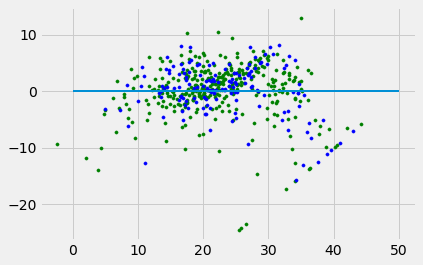

In [23]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(x_train),reg.predict(x_train) - y_train,
            color = 'green',s=10,label='Train Data')
plt.scatter(reg.predict(x_test),reg.predict(x_test) - y_test,
            color = 'blue',s=10,label='Test Data')
plt.hlines(y = 0,xmin=0,xmax=50,linewidth = 2)

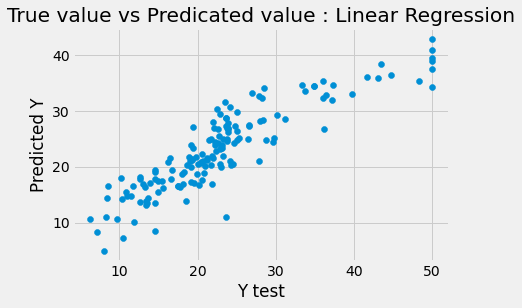

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")
plt.title("True value vs Predicated value : Linear Regression")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error ' ,mse)

rmse=np.log(np.sqrt(mse))
print('Root Mean Square Error',rmse)

score = r2_score(y_test, y_pred)
print('Score',score)
# r2 score lies between 0 and 1. IF it is closer to 1 then model is good

Mean Square Error  19.83132367206308
Root Mean Square Error 1.4936313456452481
Score 0.7836295385076297


In [28]:
print('Train Score: ', reg.score(x_train, y_train))  
print('Test Score: ', reg.score(x_test, y_test))

Train Score:  0.7103879080674731
Test Score:  0.7836295385076297


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,x,y,scoring = 'neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)
mse

-37.13180746769902


array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])